<center>
    <img width="250" src=logo.jpg />
    <h1> <font color='black'> Heart <font color='black'> Disease <font color='black'> Detection 
<center>

# Introduction

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient.

The dataset contains the following features

- age | Age | int 
- sex | Sex | bin (1 = male; 0 = female)
- cp | Chest Pain Type | int (from 0 to 4) 
- trestbps | Resting Blood Pressure int
- chol |  Serum Cholestoral | int (mg/dl)
- fbs |  Fasting Blood Sugar > 120 mg/dl | bin (1 = true; 0 = false)
- resting electrocardiographic results | ECG result at rest | (from 0 to 2)
- thalach | Maximum Heart Hate Achieved | int 
- exang | Exercise Induced Angina | bin  (1 = yes; 0 = no)
- oldpeak |  ST Depression Induced by exercise relative to rest | float
- slope | Slope of the peak exercise ST segment | int 
- ca | number of major vessels (0-3) colored by flourosopy | int
- thal | 3 = normal; 6 = fixed defect; 7 = reversable defect

The target variable is

- target | bin (1 = presence of disease; 0 = health heart)
 

# Inizialization

In [72]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for DecisionTree
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import accuracy_score

In [73]:
df=pd.read_csv('heart.csv')
df.shape

(303, 14)

In [74]:
df.isnull().sum().max() #no Nan value

0

In [75]:
df.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


# Exploration of Data

## Correlation between features and target

In [76]:
num_feat=['age', 'trestbps', 'chol', 'thalach','oldpeak','target']
cat_feat=['sex','fbs','exang','cp','restecg','slope','ca','thal','target']

- ### Numerical features with target 

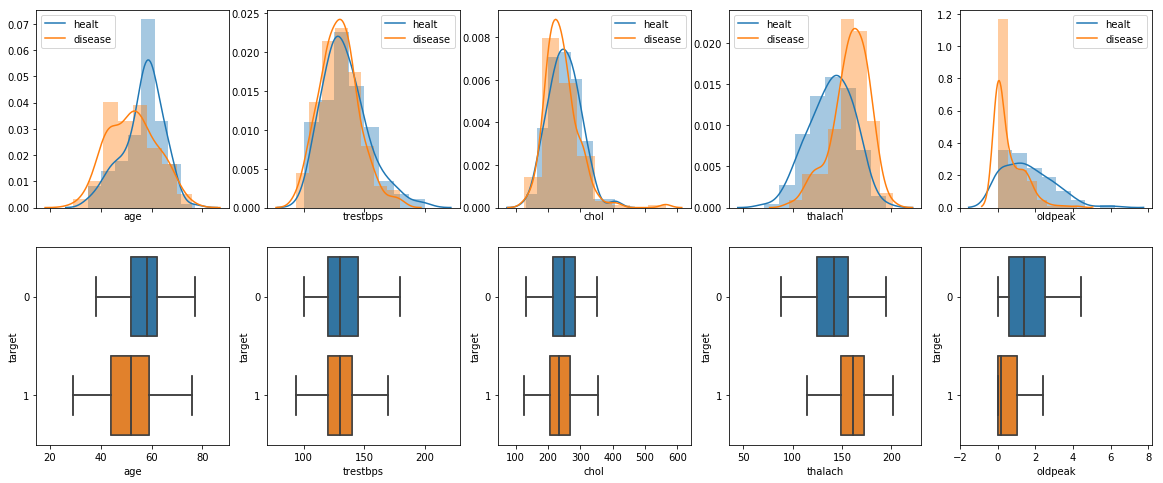

In [77]:
f1, ax1 = plt.subplots(2, 5, figsize=(20, 8), sharex='col', sharey=False)

f1=sns.distplot(df[(df.target==0)][num_feat[0]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,0])
f1=sns.distplot(df[(df.target==1)][num_feat[0]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,0])
f1=sns.boxplot(x=num_feat[0], y='target', data=df,ax=ax1[1,0],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[0], y='target', data=df,ax=ax1[1,0],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[1]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,1])
f1=sns.distplot(df[(df.target==1)][num_feat[1]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,1])
f1=sns.boxplot(x=num_feat[1], y='target', data=df,ax=ax1[1,1],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[1], y='target', data=df,ax=ax1[1,1],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[2]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,2])
f1=sns.distplot(df[(df.target==1)][num_feat[2]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,2])
f1=sns.boxplot(x=num_feat[2], y='target', data=df,ax=ax1[1,2],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[2], y='target', data=df,ax=ax1[1,2],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[3]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,3])
f1=sns.distplot(df[(df.target==1)][num_feat[3]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,3])
f1=sns.boxplot(x=num_feat[3], y='target', data=df,ax=ax1[1,3],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[3], y='target', data=df,ax=ax1[1,3],orient='h',showfliers=False)

f1=sns.distplot(df[(df.target==0)][num_feat[4]], kde_kws = {'label': 'healt'},bins = 8, ax=ax1[0,4])
f1=sns.distplot(df[(df.target==1)][num_feat[4]], kde_kws = {'label': 'disease'},bins=8, ax=ax1[0,4])
f1=sns.boxplot(x=num_feat[4], y='target', data=df,ax=ax1[1,4],orient='h',showfliers=False)
f1=sns.boxplot(x=num_feat[4], y='target', data=df,ax=ax1[1,4],orient='h',showfliers=False)

In [78]:
num_corr=abs(df[num_feat].corr()).sort_values(by='target',ascending=False)
num_corr=num_corr.sort_values(by='target',ascending=False)
num_corr

,age,trestbps,chol,thalach,oldpeak,target
target,0.225439,0.144931,0.085239,0.421741,0.430696,1.000000
oldpeak,0.210013,0.193216,0.053952,0.344187,1.000000,0.430696
thalach,0.398522,0.046698,0.009940,1.000000,0.344187,0.421741
age,1.000000,0.279351,0.213678,0.398522,0.210013,0.225439
trestbps,0.279351,1.000000,0.123174,0.046698,0.193216,0.144931
chol,0.213678,0.123174,1.000000,0.009940,0.053952,0.085239


- ### Categorical features with target 

In [79]:
chi={}
for feat in cat_feat:
    chi2=chi2_contingency(pd.crosstab(df[feat], df['target']))[1]
    chi.update({feat: chi2})
chi

{'sex': 1.8767776216941503e-06,
 'fbs': 0.7444281114149577,
 'exang': 7.454409331235655e-14,
 'cp': 1.3343043373050064e-17,
 'restecg': 0.006660598773498031,
 'slope': 4.830681934276837e-11,
 'ca': 2.712470211959332e-15,
 'thal': 2.2333507210129364e-18,
 'target': 5.4915095767950214e-67}

- ## Features selection

In [80]:
corr_min=0.1
num={}
for i in num_corr.columns:
    if i!='target':
        num.update({i : abs(num_corr.loc['target'][i])})

print(num)
for i in list(num.keys()):
    if num[i]<corr_min:
        del num[i]
num=list(num.keys())
num

{'age': 0.22543871587483694, 'trestbps': 0.14493112849775133, 'chol': 0.0852391051375688, 'thalach': 0.4217409338106738, 'oldpeak': 0.4306960016873676}


['age', 'trestbps', 'thalach', 'oldpeak']

In [81]:
cat={}
for i in list(chi.keys()):
    if chi[i]<0.05:
        cat.update({i : chi[i]})
del cat['target']
cat=list(cat.keys())
cat

['sex', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']

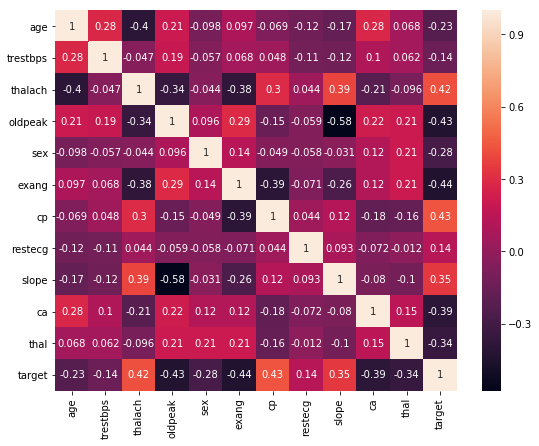

In [82]:
feat_tot=num+cat+['target']
corr_tot=df[feat_tot].corr()
plt.figure(figsize=(9,7)) 
sns.heatmap(corr_tot,annot=True)
plt.show()

In [86]:
corr_min=0.04
feat_tot=list(np.asarray(num+cat+['target']))
feat_pair={}
feat_i=[]
feat_j=[]
corrij=[]
final_feat=[]
tot_corr=abs(df[feat_tot].corr())
for i in feat_tot:
    for j in feat_tot:
        tot_corr=abs(df[feat_tot].corr())
        if i!='target' and j!='target':
            feat_i.append(i)
            feat_j.append(j)
            corrij.append(tot_corr[i][j])

feat_pair.update({ 'feat_i' : feat_i, 'feat_j' : feat_j, 'corr_ij': corrij})


cf=pd.DataFrame(feat_pair, columns=['feat_i', 'feat_j','corr_ij'])
cf.drop_duplicates(subset ='corr_ij', inplace = True)
cf = cf[cf.corr_ij != 1]

print(cf.sort_values(by='corr_ij',ascending=True).head())


final_feat.append(cf[cf.corr_ij<corr_min].feat_i)
final_feat.append(cf[cf.corr_ij<corr_min].feat_j)


final_feat=np.array(final_feat).flatten()
final_feat=np.unique(final_feat)
final_feat=list(final_feat)
final_feat.append('target')
num_of_feat=len(final_feat)
print(final_feat)
print(num_of_feat)

     feat_i   feat_j   corr_ij
87  restecg     thal  0.011981
52      sex    slope  0.030711
26  thalach      sex  0.044020
29  thalach  restecg  0.044123
73       cp  restecg  0.044421
['restecg', 'sex', 'slope', 'thal', 'target']
5


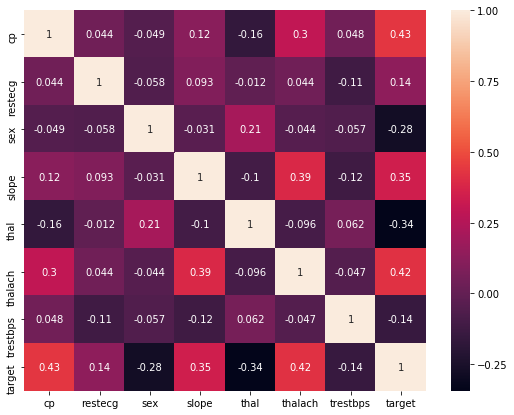

In [37]:
corr_tot=df[final_feat].corr()
plt.figure(figsize=(9,7)) 
sns.heatmap(corr_tot,annot=True)
plt.show()

# Train the model

In [4]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(212, 14)
(91, 14)


- ## Training without feature selection

In [5]:
train_X = train.drop('target',axis=1)# taking the training data features
train_y=train.target# output of our training data
test_X= test.drop('target',axis=1) # taking test data features
test_y =test.target   #output value of test data

In [7]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(train_X,train_y)
pred_y=model.predict(test_X)

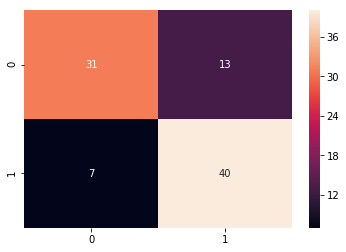

In [191]:
sns.heatmap(confusion_matrix(test_y, pred_y), annot=True)

In [192]:
print('The accuracy of the Logistic Regression without feature selection is',metrics.accuracy_score(pred_y,test_y))

The accuracy of the Logistic Regression without feature selection is 0.7802197802197802


- ## Training with feature selection

In [193]:
train_X = train[final_feat].drop('target',axis=1)# taking the training data features
train_y=train.target# output of our training data
test_X= test[final_feat].drop('target',axis=1) # taking test data features
test_y =test.target   #output value of test data

In [195]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(train_X,train_y)
pred_y=model.predict(test_X)

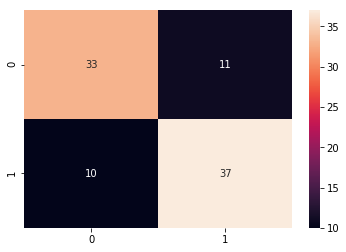

In [196]:
sns.heatmap(confusion_matrix(test_y, pred_y), annot=True)

In [197]:
accuracymetrics.accuracy_score(pred_y,test_y)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(pred_y,test_y))

The accuracy of the Logistic Regression is 0.7692307692307693


- ## Training with Decision Tree

In [59]:
train_X = train.drop('target',axis=1)# taking the training data features
train_y=train.target# output of our training data
test_X= test.drop('target',axis=1) # taking test data features
test_y =test.target   #output value of test data

In [123]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(train_X, train_y)
pred_y=tree.predict(test_X)

In [124]:
print('The accuracy of the Decision Tree is', metrics.accuracy_score(pred_y,test_y))

The accuracy of the Decision Tree is 0.7692307692307693


In [69]:
features_imp = pd.DataFrame(
    data=np.asarray([df.drop('target',axis=1).columns, tree.feature_importances_]).transpose(),
    columns=['Variable','Importance'])

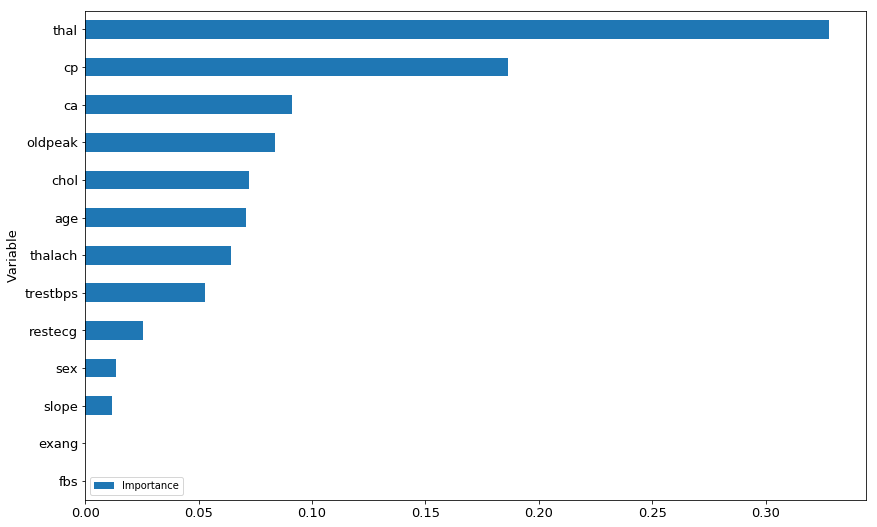

In [68]:
features_imp.set_index("Variable").sort_values(by="Importance").plot.barh(figsize=(14, 9))
for item in ([plt.gca().title, plt.gca().xaxis.label, plt.gca().yaxis.label] +
             plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    item.set_fontsize(13)

In [87]:
final_feat

['restecg', 'sex', 'slope', 'thal', 'target']